# 1. Dataset Overview

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Dataset Summary

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. Missing Value Analysis

In [4]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
Cabin,687
Age,177
Embarked,2


3(a) Visualizing Missing Values

<Axes: >

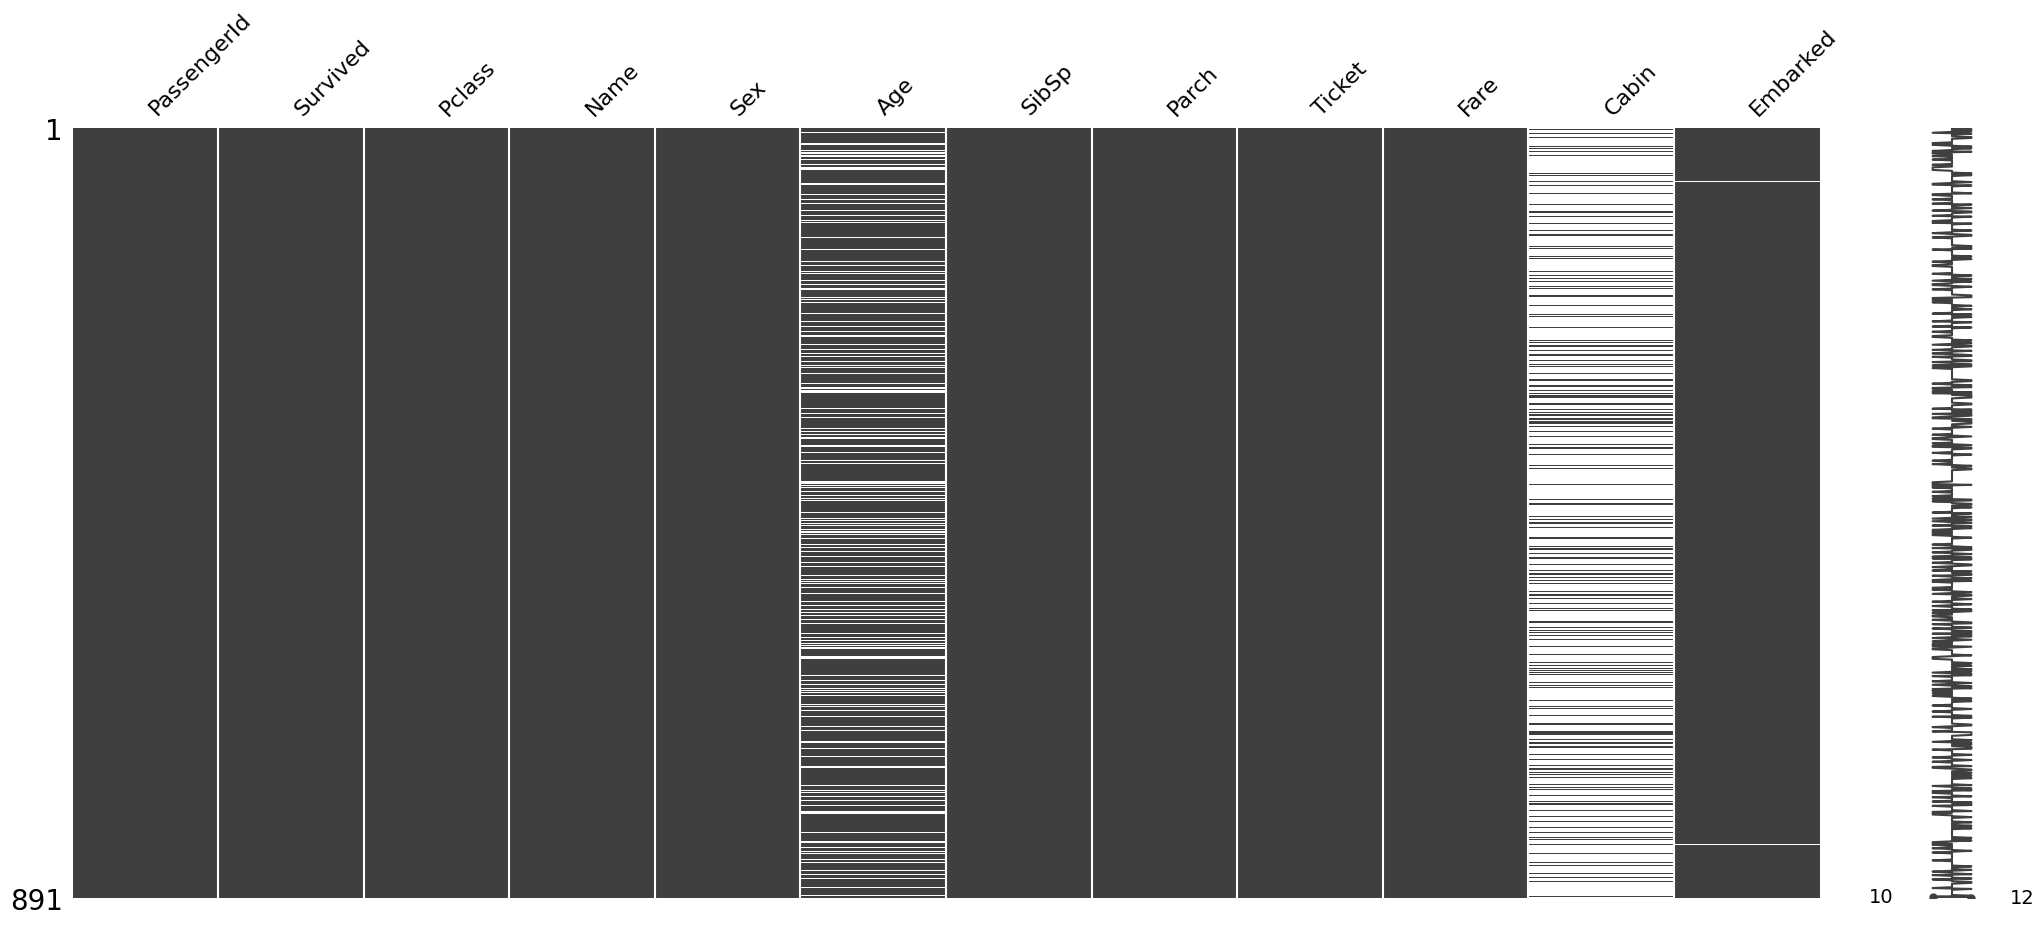

In [5]:
import missingno as msno
msno.matrix(df)


# 4. Univariate Analysis

4(a)- Basic Survival Chart

<Axes: xlabel='Survived', ylabel='count'>

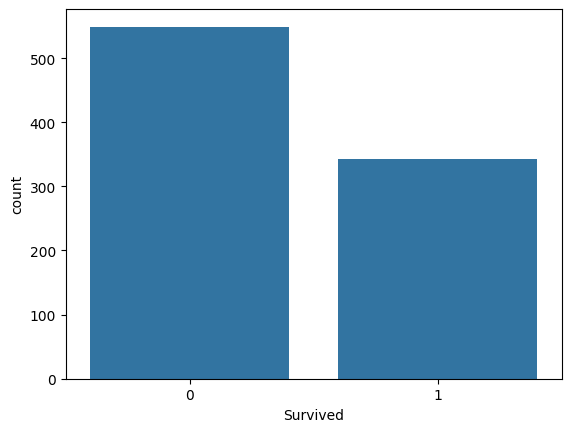

In [6]:
sns.countplot(data=df, x='Survived')


4(b)- Variable: sex,



Result: Females had significantly higher survival rates.

<Axes: xlabel='Sex', ylabel='count'>

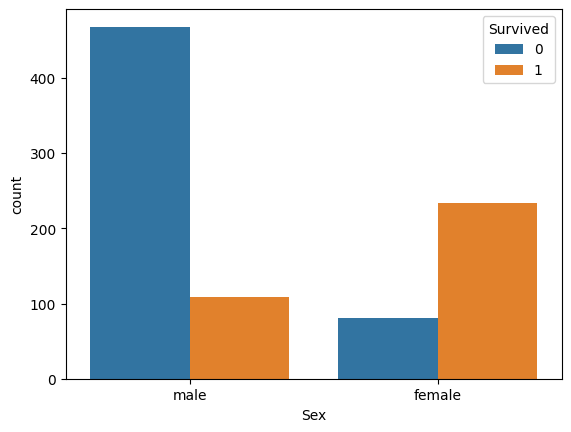

In [7]:
sns.countplot(data=df, x='Sex', hue='Survived')


4(c)- Variable: Pclass (Passenger Class)

Result: First-class passengers had the highest survival rate.

<Axes: xlabel='Pclass', ylabel='count'>

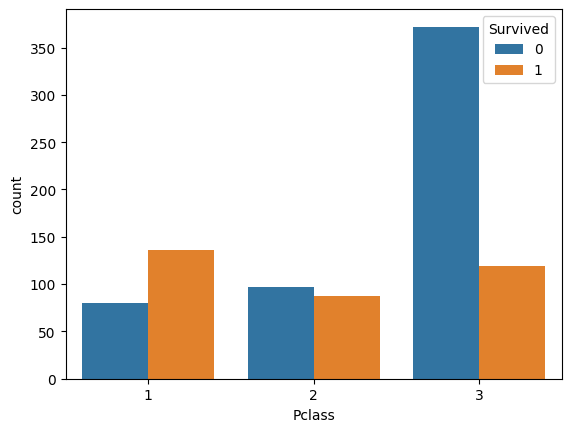

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived')


4(d)- Variable: Age

Result- Distribution is right-skewed; children and younger adults dominate.

<Axes: xlabel='Age', ylabel='Count'>

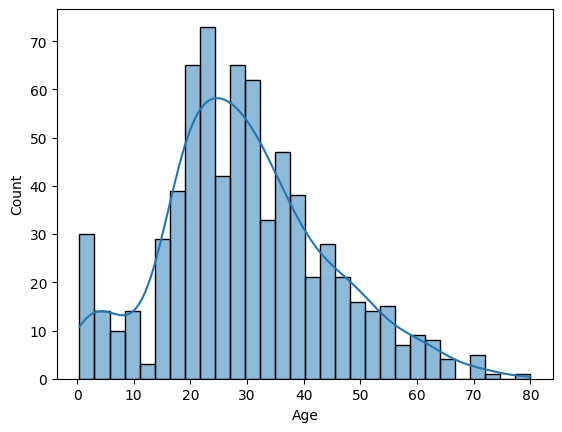

In [9]:
sns.histplot(df['Age'].dropna(), kde=True, bins=30)


4(e)- Variable: Fare

Result- Highly skewed, with some extreme outliers.

(0.0, 300.0)

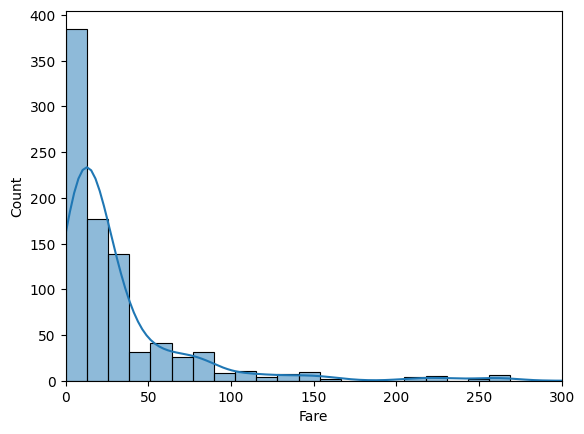

In [10]:
sns.histplot(df['Fare'], kde=True, bins=40)
plt.xlim(0, 300)


# 5. Outlier Detection

Result-
Fare has strong outliers (>250).

Age has some but not extreme outliers.

<Axes: xlabel='Fare'>

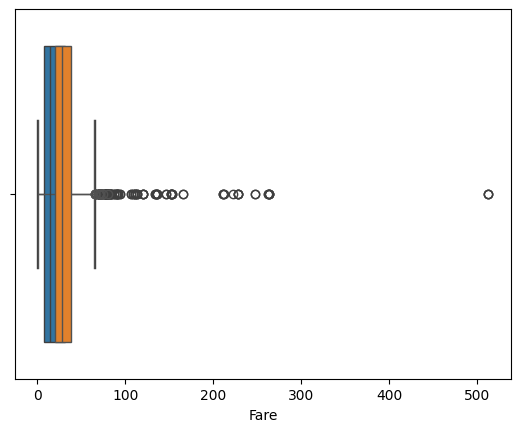

In [13]:
sns.boxplot(x=df['Fare'])
sns.boxplot(x=df['Age'])


# 6. Bivariate Analysis

6(a)- Correlation Heatmap

Result- Fare and Pclass are negatively correlated.

Survived positively correlates with Fare, negatively with Pclass.

<Axes: >

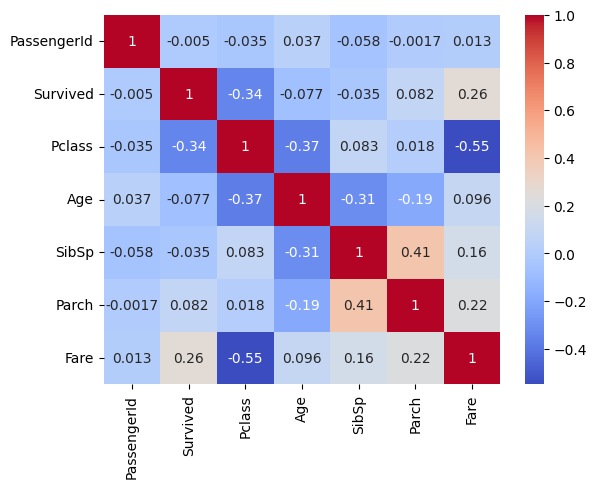

In [14]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


6(b)- Age vs Survived

Result- Children (<15) had a higher chance of survival.

<Axes: xlabel='Age', ylabel='Count'>

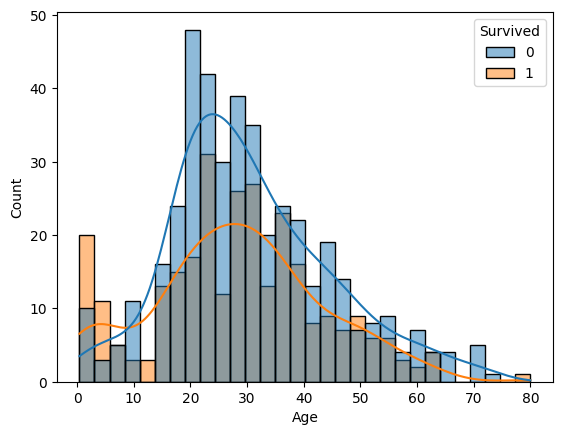

In [15]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)


6(c)- Pclass vs Fare vs Survived

Result- Higher fare = better class = better survival.

<Axes: xlabel='Pclass', ylabel='Fare'>

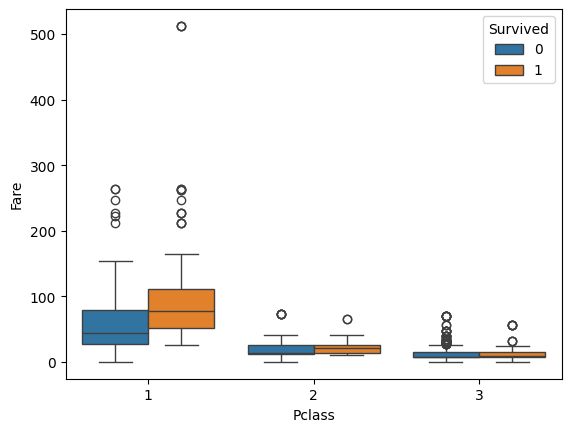

In [16]:
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived')


# 7. Categorical Features

Embarked

Port C (Cherbourg) had the highest survival compared with mortality rate.

<Axes: xlabel='Embarked', ylabel='count'>

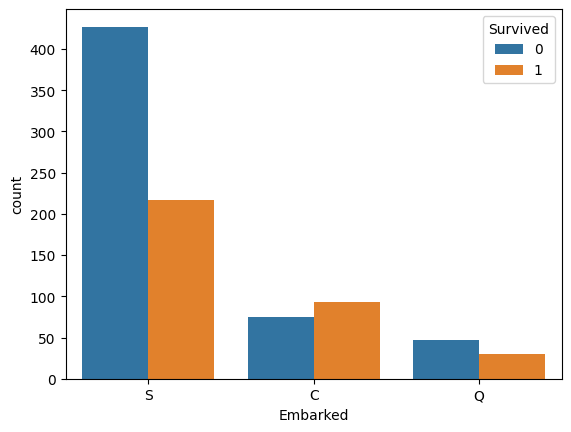

In [17]:
sns.countplot(data=df, x='Embarked', hue='Survived')


# 8. Handling Missing Values

Age: Impute using median or predictive models.

Embarked: Fill with mode ('S').

Cabin: Drop or replace with 'Unknown'.

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
